# Experimenting with Nasdaq Data Link

Hongli Zhao, *honglizhaobob@uchicago.edu* 

Jerry Liu, *lhy0518@uchicago.edu*

In the following experiments, we survey a range of different trading strategies based on stock data acquired from [Nasdaq Data Link](https://data.nasdaq.com/). 

**Reference**:

[1] Time series decomposition:  https://otexts.com/fpp2/stl.html

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn', supresses warning
import scipy
import os
import matplotlib.pyplot as plt
%matplotlib inline

# nasdaq data link
import nasdaqdatalink as qdl

# Useful links:
# - Authentication: https://github.com/Nasdaq/data-link-python/#local-api-key-environment-variable
#plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# fix seed
np.random.seed(10)

# Yahoo data
import pandas_datareader.data as web
import datetime as dt

# seasonality
import statsmodels
from statsmodels.tsa.seasonal import STL

## Load Data

* We choose stocks that exhibit sufficient seasonality and low volatility from the retail industry. For the purpose of demonstration, we focus on large-cap (defined as companies with market capitalization value of $>\$10$ billion), and choose 3 stocks to run our simulations for simplicity. Source: https://money.usnews.com/investing/stocks/search?large-cap=true&industry=retail-trade


In [2]:
all_tickers = ['COST', 'KR', 'AZO', 'CVS', 'ORLY', 'LOW', 'DLTR', 'TSCO', 'TGT', \
              'HD', 'AAP', 'WSM', 'DG', 'ULTA', 'BBY', 'LULU', 'WMT', 'TJX', 'WBA', \
              'EBAY', 'TPR', 'AMZN', 'BBWI', 'LAD', 'KMX', 'ROST', 'MELI']
len(all_tickers)

27

[-] Now loading COST
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

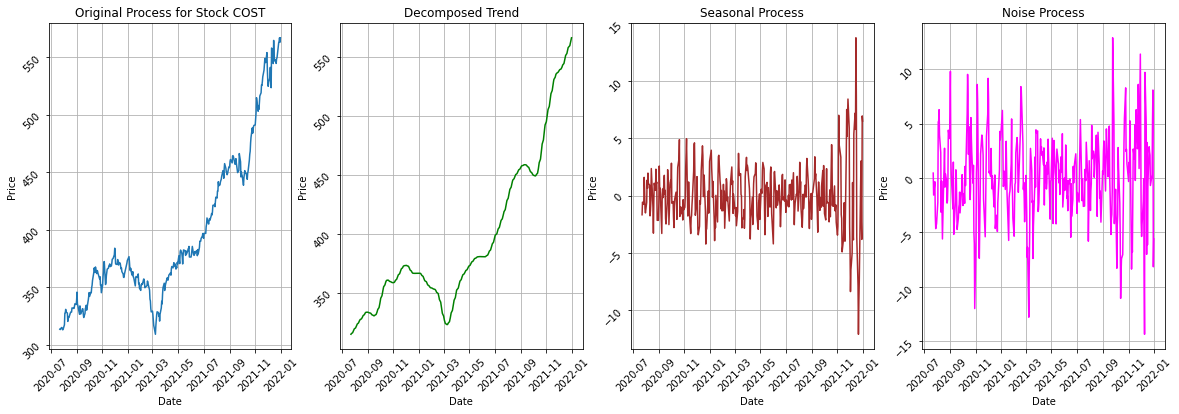

[-] Now loading KR
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

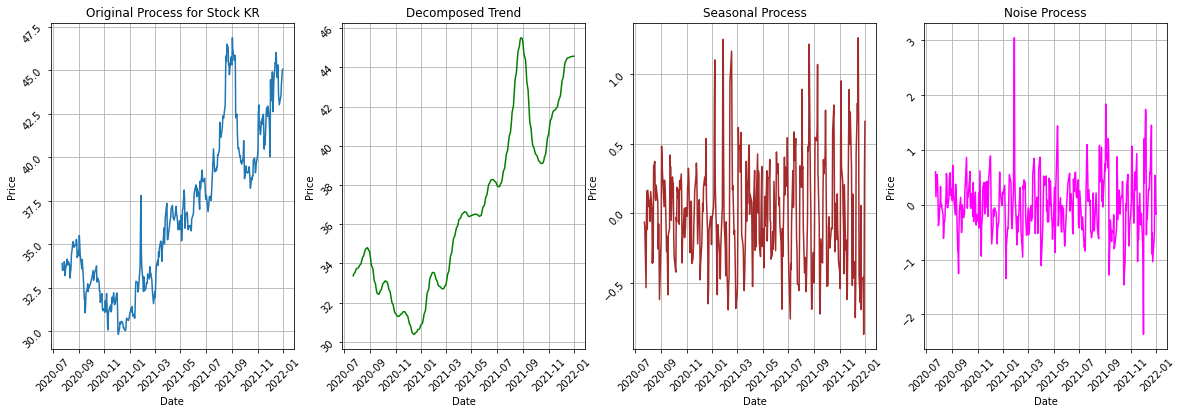

[-] Now loading AZO
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

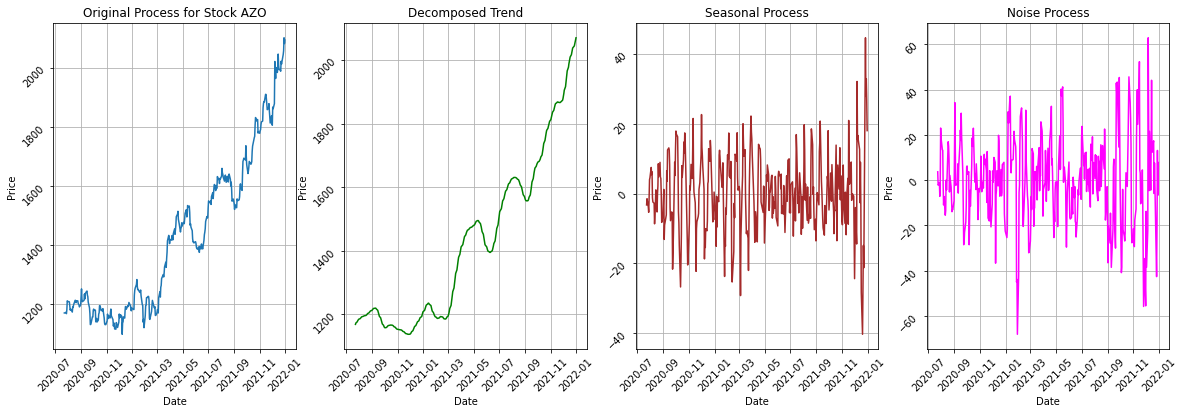

[-] Now loading CVS
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

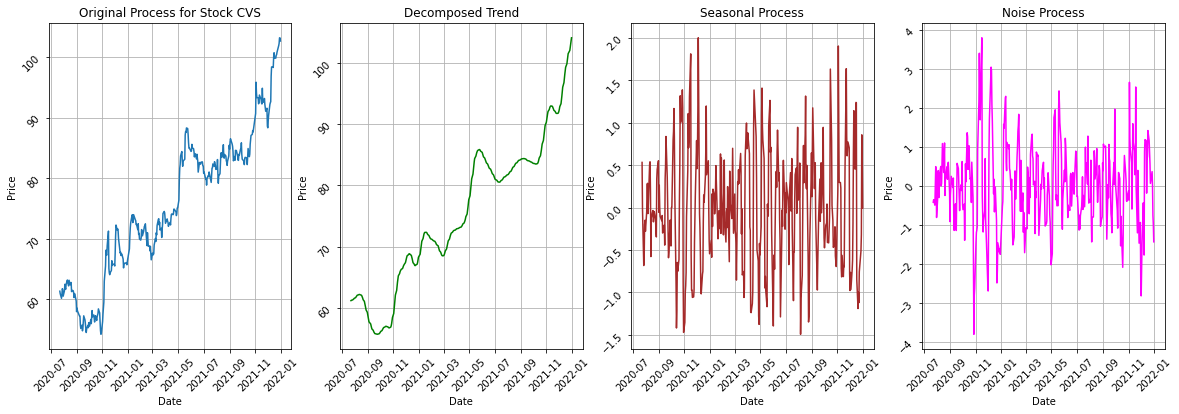

[-] Now loading ORLY
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

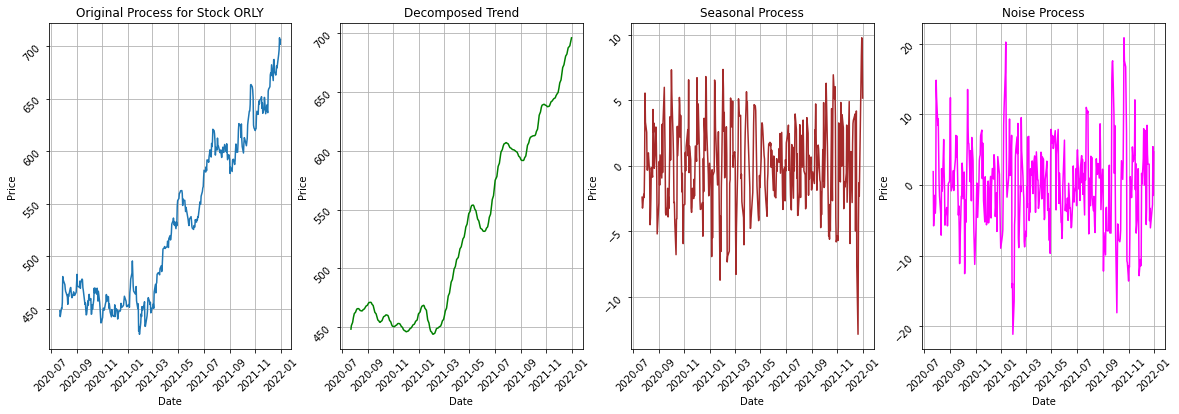

[-] Now loading LOW
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

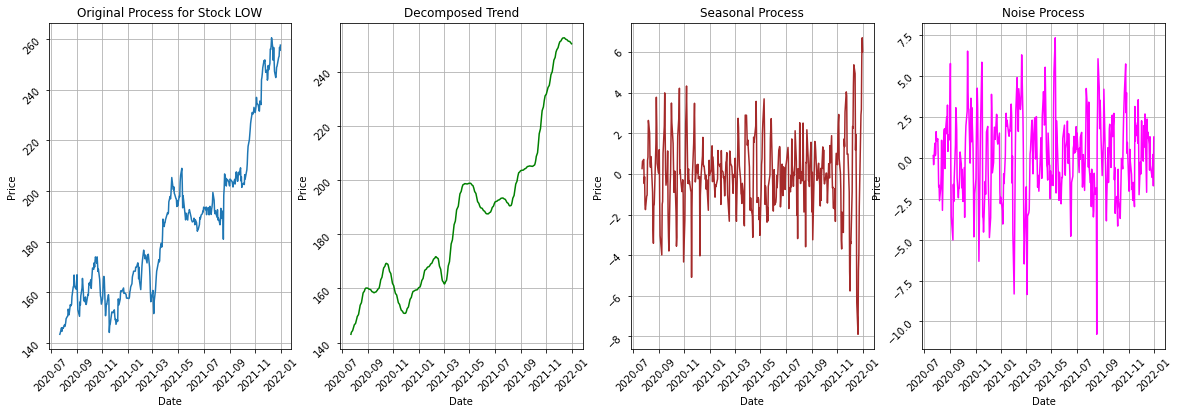

[-] Now loading DLTR
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

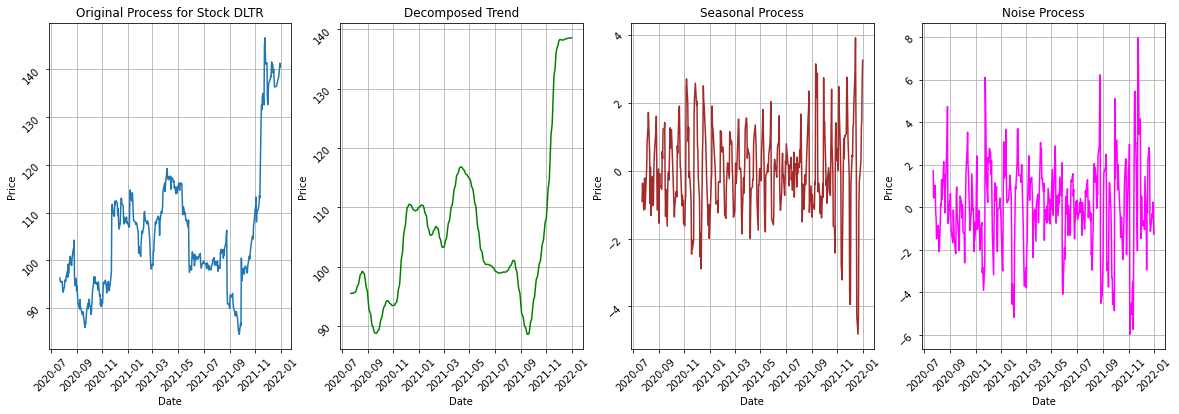

[-] Now loading TSCO
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

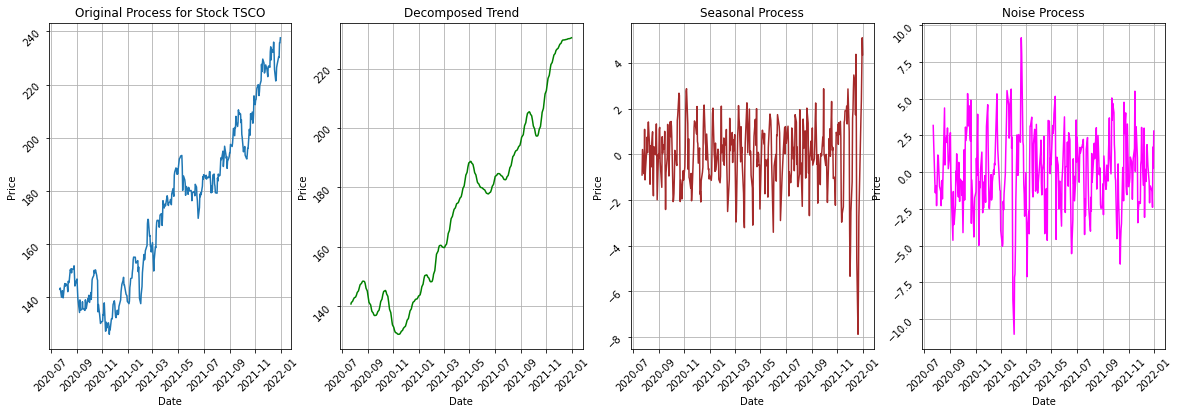

[-] Now loading TGT
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

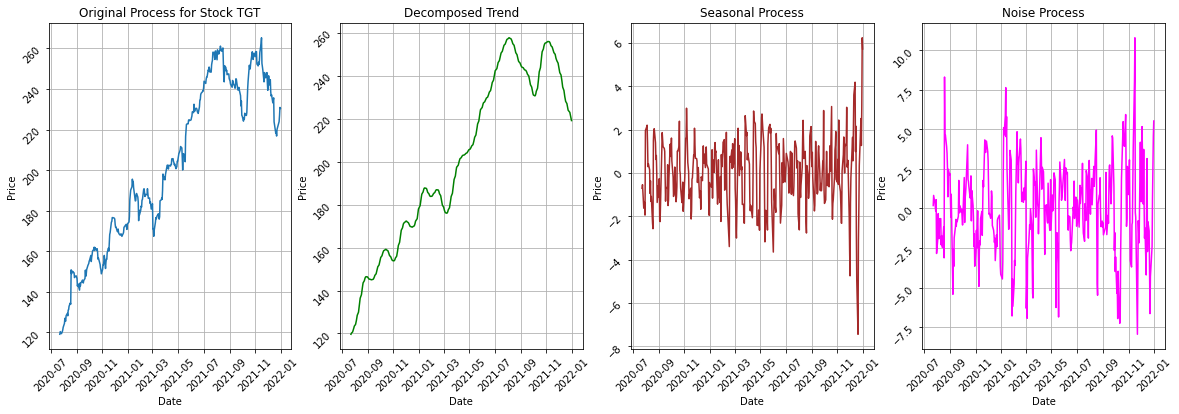

[-] Now loading HD
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

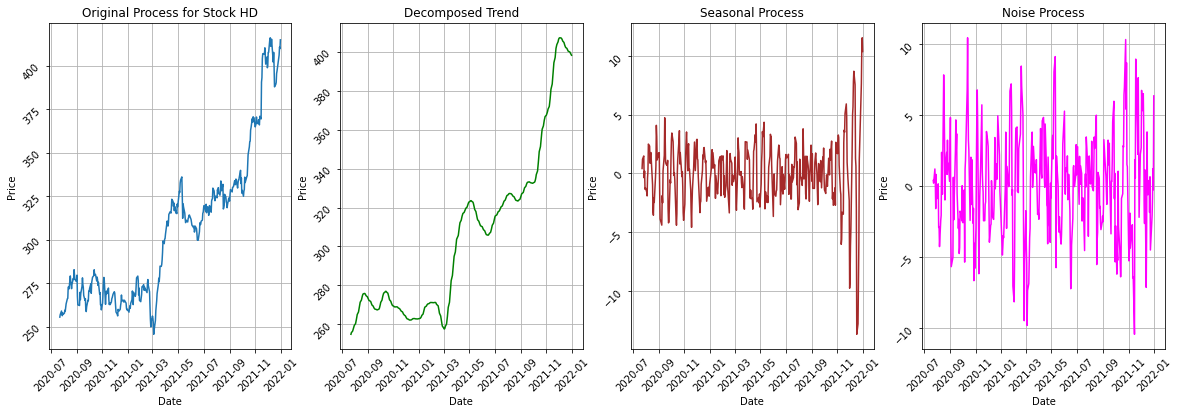

[-] Now loading AAP
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

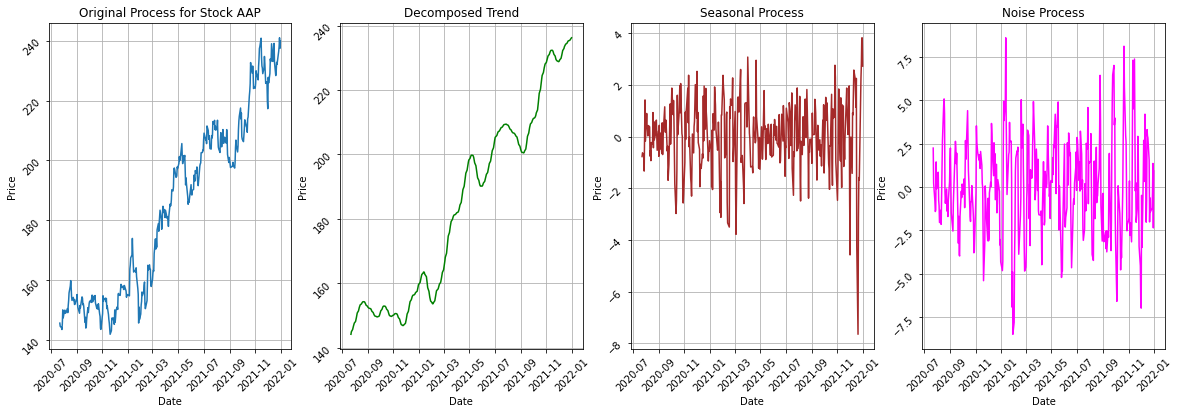

[-] Now loading WSM
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

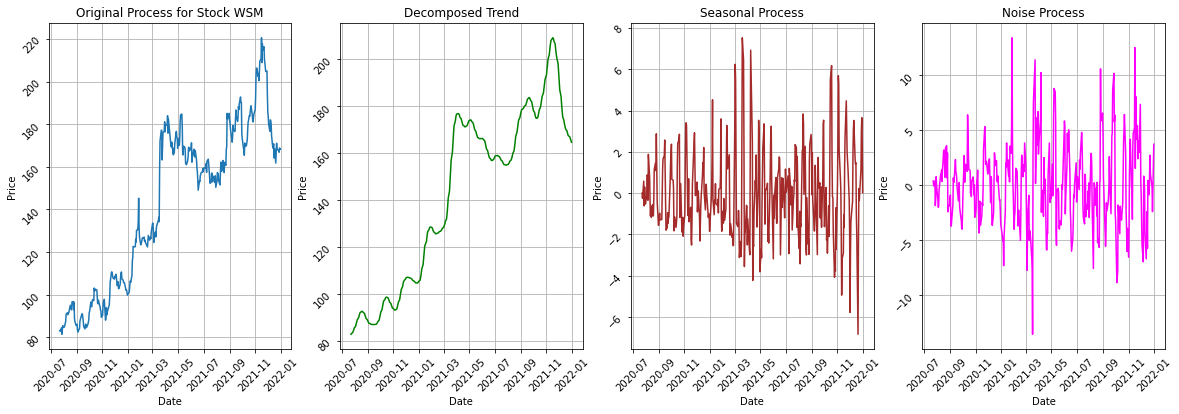

[-] Now loading DG
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

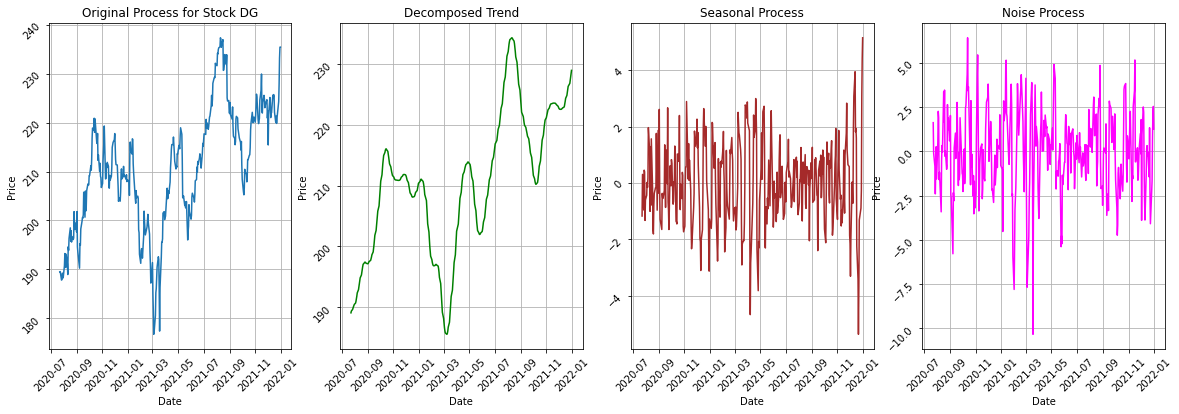

[-] Now loading ULTA
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

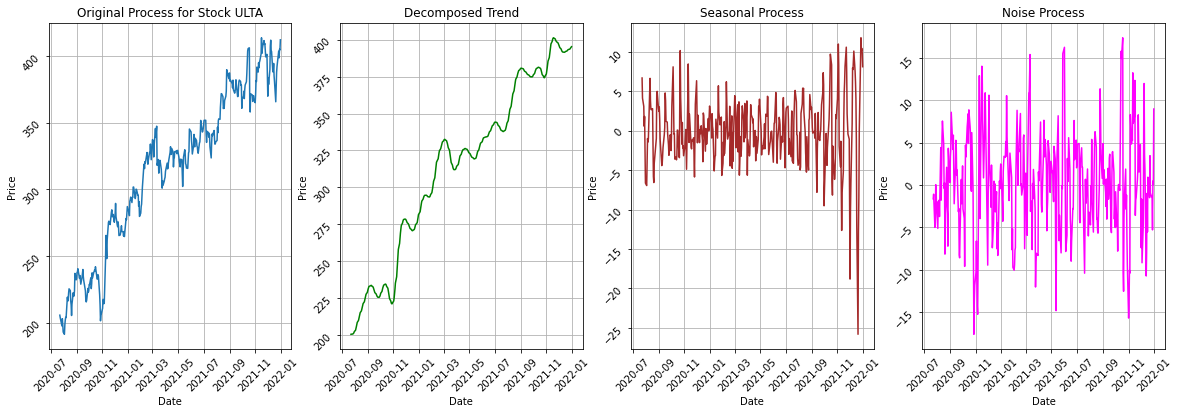

[-] Now loading BBY
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

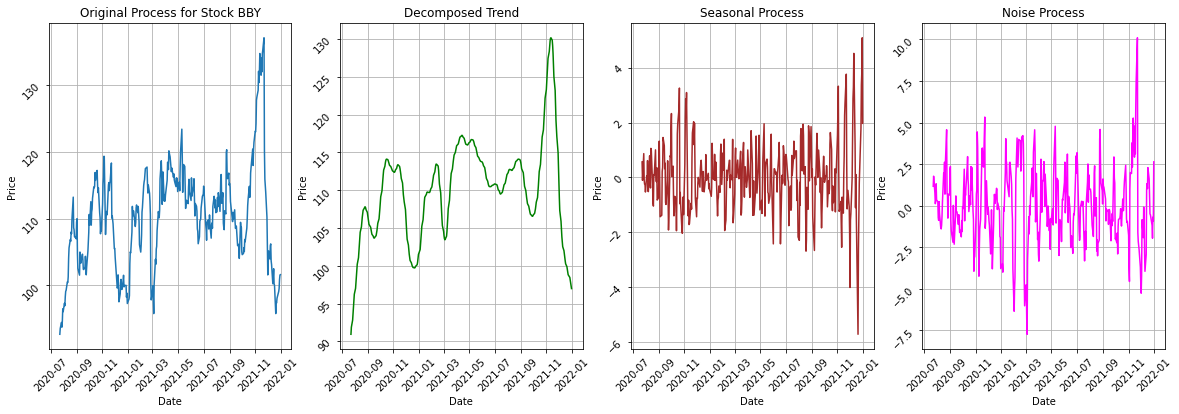

[-] Now loading LULU
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

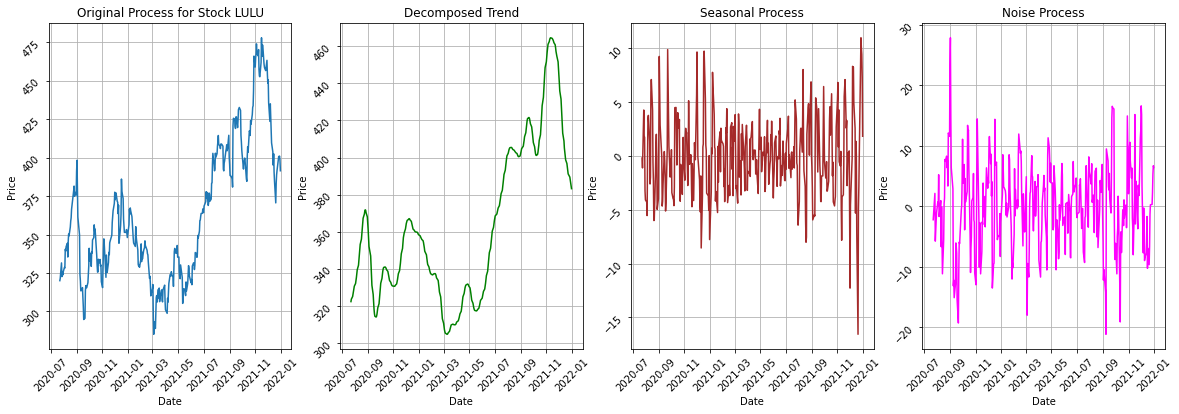

[-] Now loading WMT
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

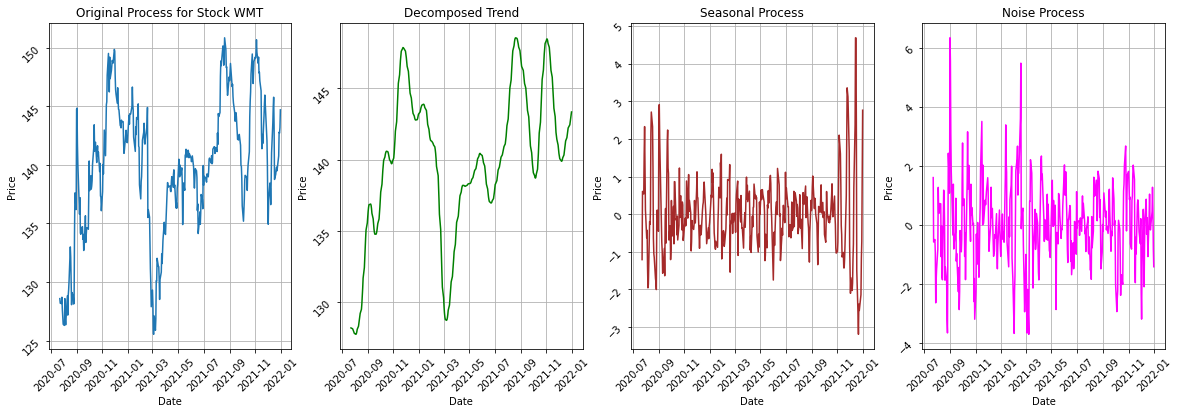

[-] Now loading TJX
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

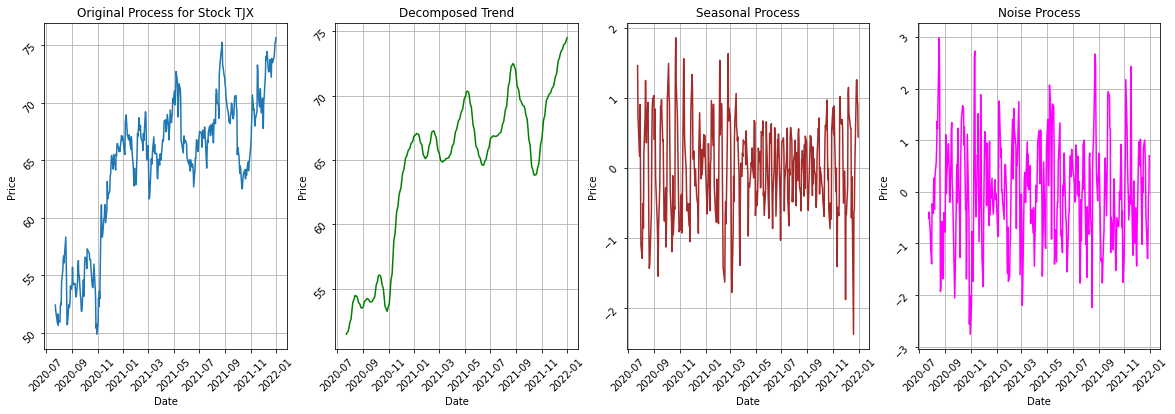

[-] Now loading WBA
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

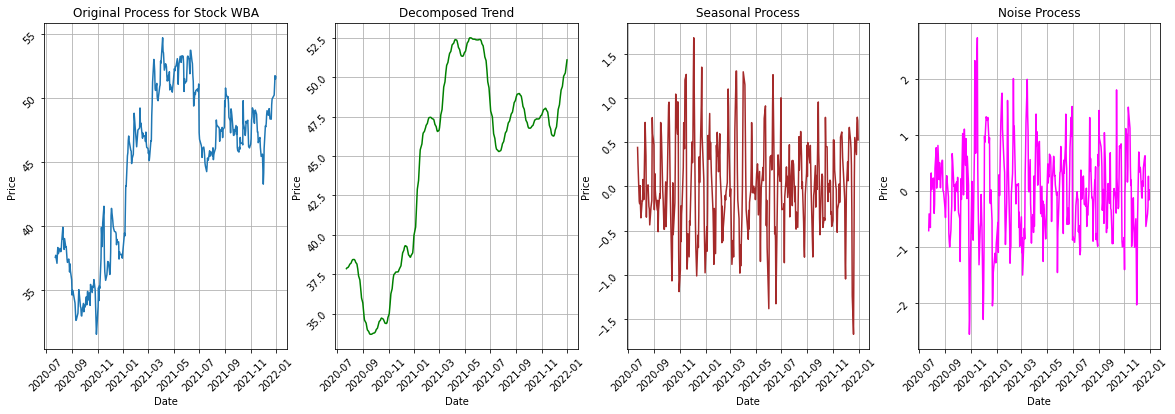

[-] Now loading EBAY
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

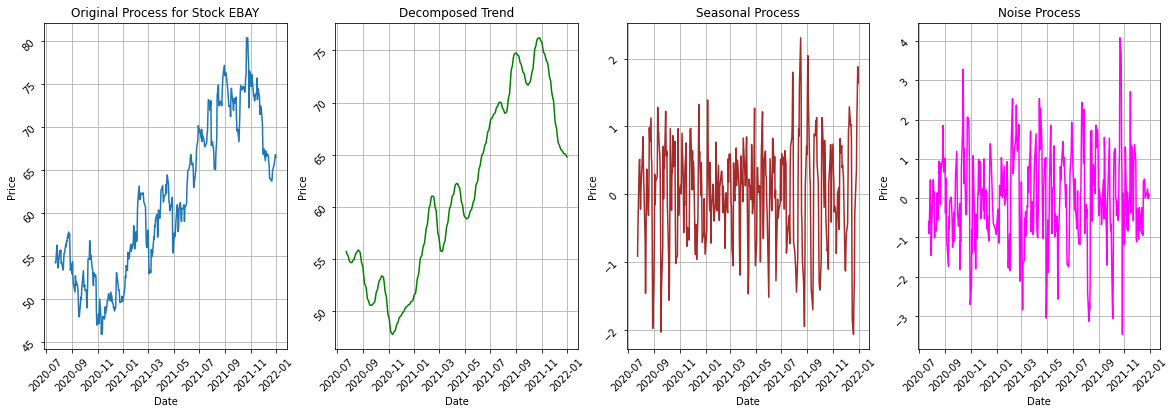

[-] Now loading TPR
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

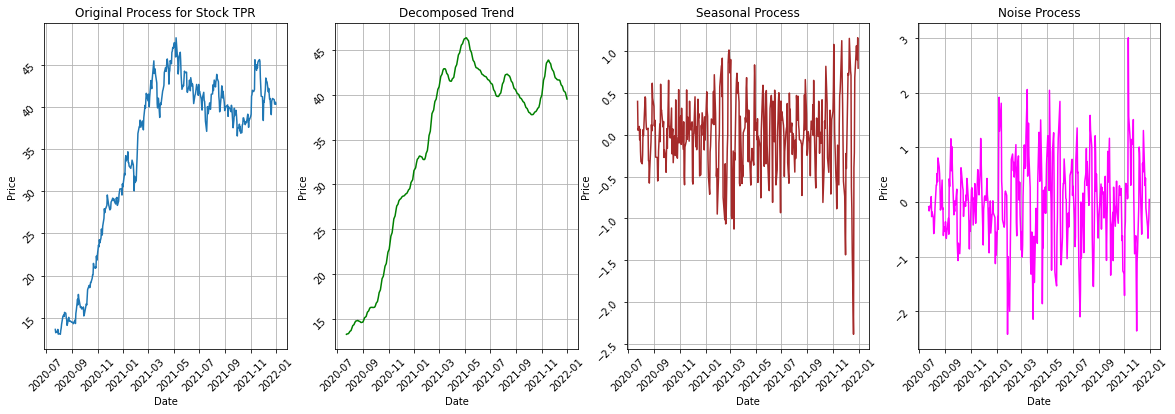

[-] Now loading AMZN
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

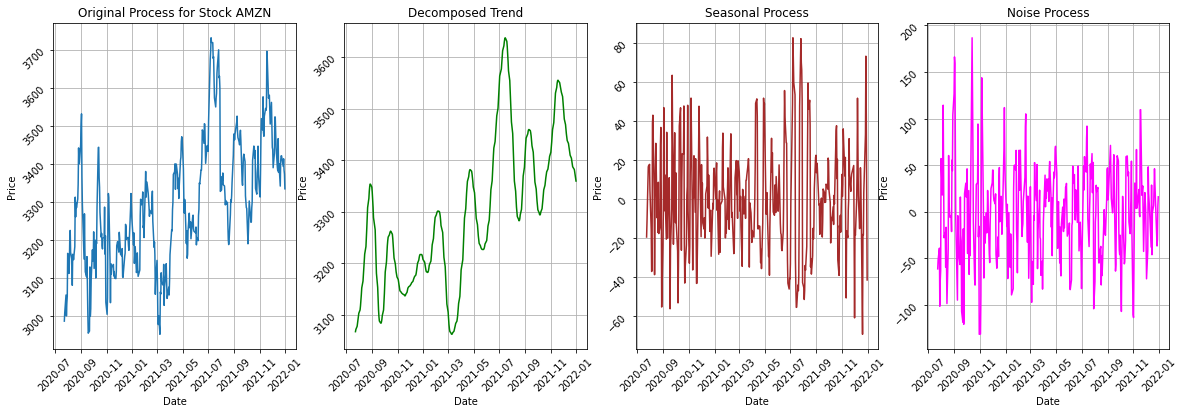

[-] Now loading BBWI
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

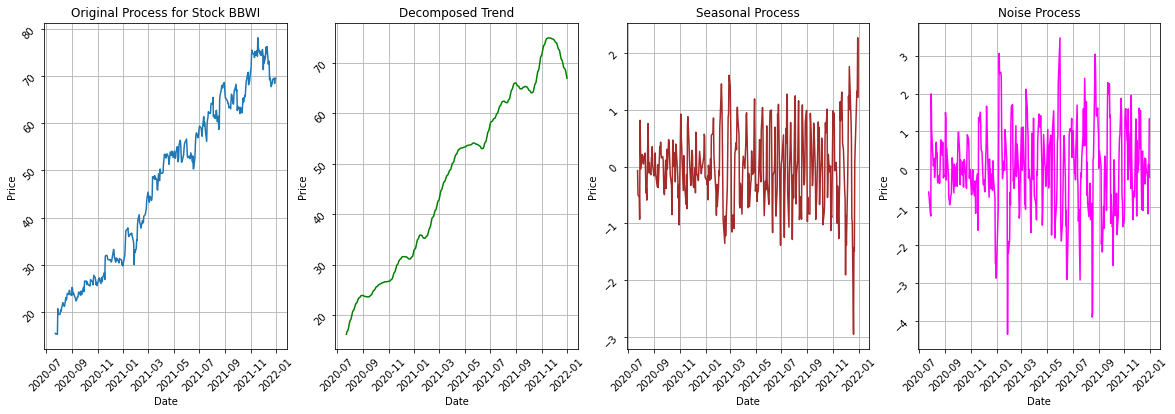

[-] Now loading LAD
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

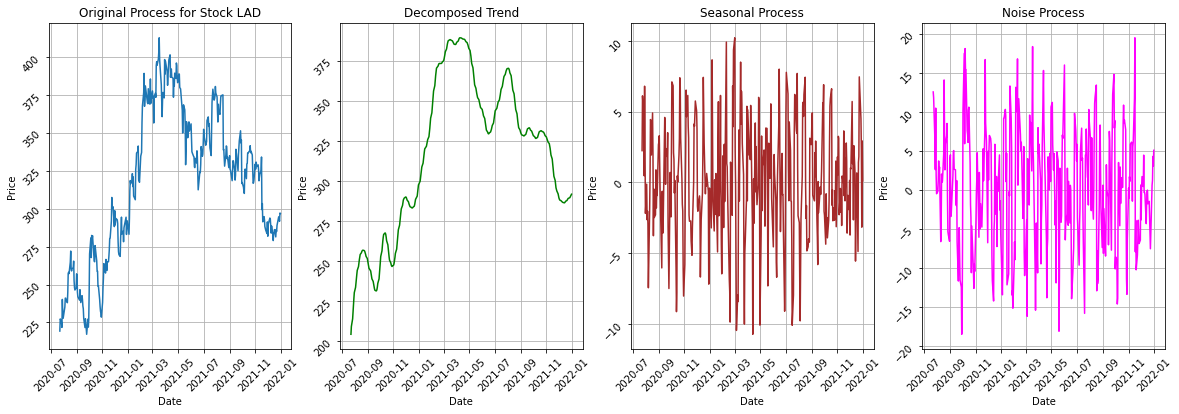

[-] Now loading KMX
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

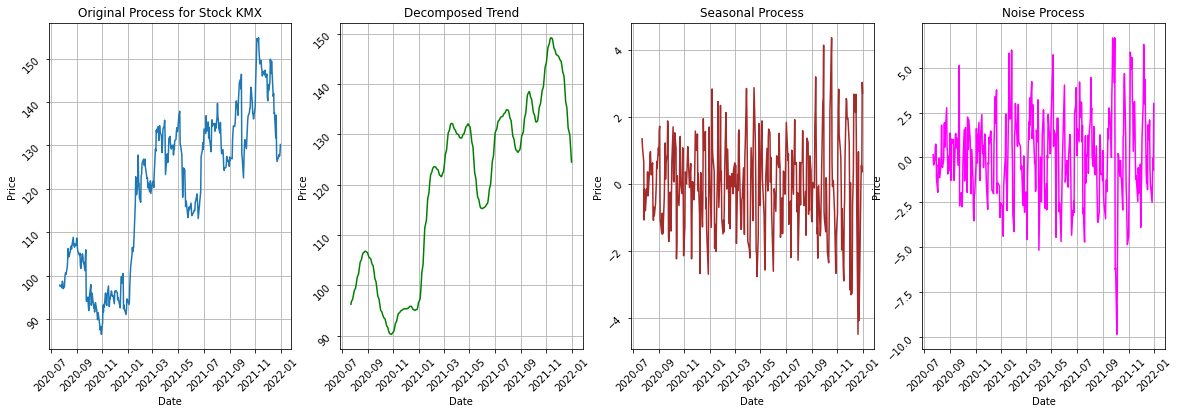

[-] Now loading ROST
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

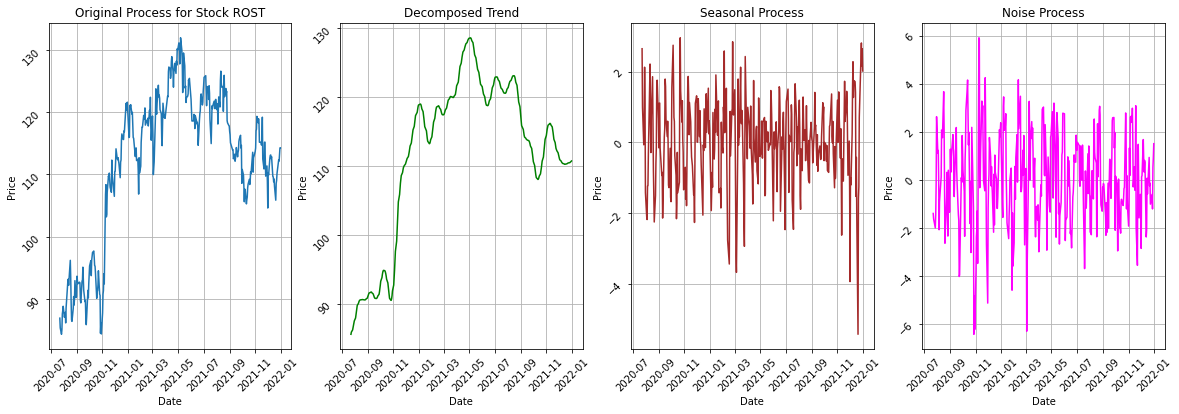

[-] Now loading MELI
[>] Earliest data: 2012-01-03 00:00:00 -- 2021-12-31 00:00:00


<Figure size 432x288 with 0 Axes>

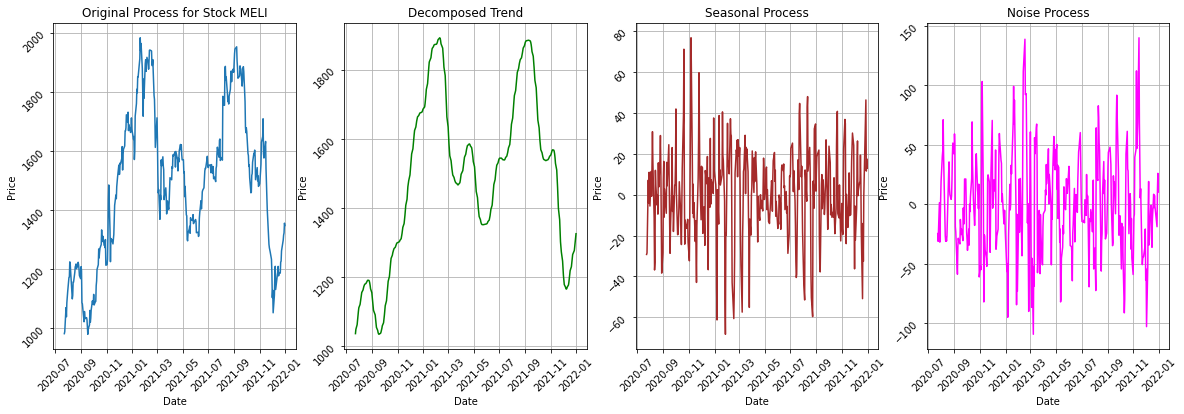

In [3]:
# test data exists
all_strength = []
all_vol = []
for i in range(len(all_tickers)):
    ticker = all_tickers[i]
    print("[-] Now loading {}".format(ticker))
    df = web.DataReader(ticker, 'yahoo', start='2012-01-01', end='2022-01-01')
    print("[>] Earliest data: {} -- {}".format(df.index[0], df.index[-1]))
    plt.figure(i+1)
    adj_close = df['Adj Close']
    all_dates = adj_close.index
    # STL decomposition (number of trading days in a quarter)
    stl_decomposition = STL(adj_close, 13).fit()
    seasonal = stl_decomposition.seasonal
    trend = stl_decomposition.trend
    noise = stl_decomposition.resid
    # subplots
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))
    axs[0].tick_params(labelrotation=45)
    axs[1].tick_params(labelrotation=45)
    axs[2].tick_params(labelrotation=45)
    axs[3].tick_params(labelrotation=45)
    axs[0].plot(all_dates[-365:], adj_close[-365:]);
    axs[0].set_xlabel('Date'); axs[0].set_ylabel("Price");
    axs[0].set_title("Original Process for Stock {}".format(ticker))
    axs[0].grid(True)
    
    axs[1].plot(all_dates[-365:], trend[-365:], color='green');
    axs[1].set_xlabel('Date'); axs[1].set_ylabel("Price");
    axs[1].set_title("Decomposed Trend")
    axs[1].grid(True)
    
    axs[2].plot(all_dates[-365:], seasonal[-365:], color='brown');
    axs[2].set_xlabel('Date'); axs[2].set_ylabel("Price");
    axs[2].set_title("Seasonal Process")
    axs[2].grid(True)
    
    axs[3].plot(all_dates[-365:], noise[-365:], color='magenta');
    axs[3].set_xlabel('Date'); axs[3].set_ylabel("Price");
    axs[3].set_title("Noise Process")
    axs[3].grid(True)
    plt.show()
    # compute estimated seasonality strength
    all_strength.append(np.amax([0, np.var(noise)/(np.var(noise) + np.var(seasonal))]))
    all_vol.append(np.std(adj_close))

In [4]:
# sort and append index
for i in range(len(all_strength)):
    all_strength[i] = (i, all_strength[i])
    all_vol[i] = (i, all_vol[i])

In [5]:
all_strength.sort(key=lambda x: x[1], reverse=True)
all_strength

[(21, 0.7850176387732521),
 (26, 0.7710213985097529),
 (18, 0.7698002054858822),
 (22, 0.7693251495920939),
 (1, 0.7605124482880847),
 (12, 0.7598392694238674),
 (23, 0.7560676599553099),
 (8, 0.7540189032069761),
 (0, 0.7538966580291845),
 (10, 0.7533099631141641),
 (7, 0.7503137520689243),
 (15, 0.7501262806530734),
 (2, 0.7475275407442554),
 (4, 0.7466244612649596),
 (14, 0.7398187760173769),
 (20, 0.7396011723504552),
 (11, 0.7392424305734924),
 (3, 0.7384809983101525),
 (16, 0.7377716853621447),
 (24, 0.7367971687523069),
 (19, 0.7337201879180898),
 (6, 0.7309108774409527),
 (17, 0.7254262784639314),
 (25, 0.7242565433506635),
 (13, 0.7196196742913649),
 (5, 0.6948711889083388),
 (9, 0.6831230602933471)]

In [6]:
all_strength2 = [(all_tickers[int(s[0])], s[1]) for s in all_strength]
all_strength2

[('AMZN', 0.7850176387732521),
 ('MELI', 0.7710213985097529),
 ('WBA', 0.7698002054858822),
 ('BBWI', 0.7693251495920939),
 ('KR', 0.7605124482880847),
 ('DG', 0.7598392694238674),
 ('LAD', 0.7560676599553099),
 ('TGT', 0.7540189032069761),
 ('COST', 0.7538966580291845),
 ('AAP', 0.7533099631141641),
 ('TSCO', 0.7503137520689243),
 ('LULU', 0.7501262806530734),
 ('AZO', 0.7475275407442554),
 ('ORLY', 0.7466244612649596),
 ('BBY', 0.7398187760173769),
 ('TPR', 0.7396011723504552),
 ('WSM', 0.7392424305734924),
 ('CVS', 0.7384809983101525),
 ('WMT', 0.7377716853621447),
 ('KMX', 0.7367971687523069),
 ('EBAY', 0.7337201879180898),
 ('DLTR', 0.7309108774409527),
 ('TJX', 0.7254262784639314),
 ('ROST', 0.7242565433506635),
 ('ULTA', 0.7196196742913649),
 ('LOW', 0.6948711889083388),
 ('HD', 0.6831230602933471)]

In [7]:
all_vol.sort(key=lambda x: x[1], reverse=False)
all_vol

[(1, 8.505294723619457),
 (20, 9.115099757025696),
 (19, 14.260044415686055),
 (18, 14.524937099041788),
 (22, 14.97871469412305),
 (17, 15.23705253602795),
 (3, 15.469642743961925),
 (6, 22.134364792419884),
 (24, 27.36725045869403),
 (16, 29.52871520569341),
 (25, 31.185040575897194),
 (14, 31.512869513726724),
 (11, 37.17875132826548),
 (10, 38.7627734820144),
 (7, 42.078867173428975),
 (5, 50.71441633390583),
 (8, 53.878370773181025),
 (12, 56.822198268806204),
 (9, 85.6470395086085),
 (13, 89.53193899803216),
 (23, 89.71199764678063),
 (0, 108.9099095988089),
 (15, 111.10759807551723),
 (4, 144.54093871316218),
 (2, 354.19567986054153),
 (26, 483.51990967107685),
 (21, 1052.6863542652377)]

In [8]:
all_vol2 = [(all_tickers[int(s[0])], s[1]) for s in all_vol]
all_vol2

[('KR', 8.505294723619457),
 ('TPR', 9.115099757025696),
 ('EBAY', 14.260044415686055),
 ('WBA', 14.524937099041788),
 ('BBWI', 14.97871469412305),
 ('TJX', 15.23705253602795),
 ('CVS', 15.469642743961925),
 ('DLTR', 22.134364792419884),
 ('KMX', 27.36725045869403),
 ('WMT', 29.52871520569341),
 ('ROST', 31.185040575897194),
 ('BBY', 31.512869513726724),
 ('WSM', 37.17875132826548),
 ('AAP', 38.7627734820144),
 ('TSCO', 42.078867173428975),
 ('LOW', 50.71441633390583),
 ('TGT', 53.878370773181025),
 ('DG', 56.822198268806204),
 ('HD', 85.6470395086085),
 ('ULTA', 89.53193899803216),
 ('LAD', 89.71199764678063),
 ('COST', 108.9099095988089),
 ('LULU', 111.10759807551723),
 ('ORLY', 144.54093871316218),
 ('AZO', 354.19567986054153),
 ('MELI', 483.51990967107685),
 ('AMZN', 1052.6863542652377)]

<BarContainer object of 27 artists>

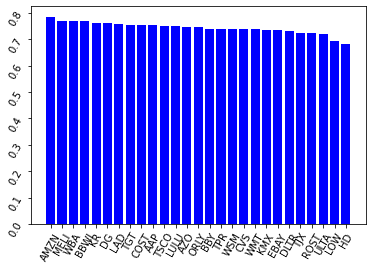

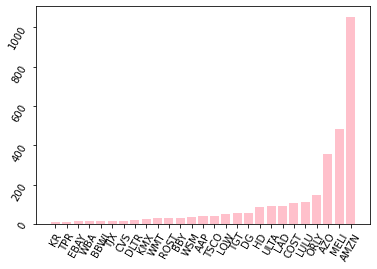

In [9]:
plt.figure(1)
plt.tick_params(labelrotation=60)
plt.bar([s[0] for s in all_strength2], [s[1] for s in all_strength2], color='blue')

plt.figure(2)
plt.tick_params(labelrotation=60)
plt.bar([s[0] for s in all_vol2], [s[1] for s in all_vol2], color='pink')

In [10]:
# load the decided data
wba = web.DataReader('WBA', 'yahoo', start='2012-01-01', end='2022-01-01')
bbwi = web.DataReader('BBWI', 'yahoo', start='2012-01-01', end='2022-01-01')
kr = web.DataReader('KR', 'yahoo', start='2012-01-01', end='2022-01-01')
all_dates = wba.index

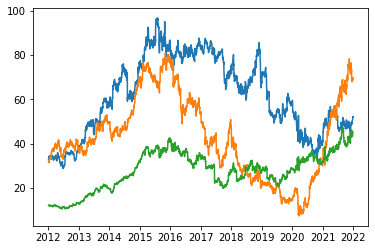

In [11]:
# visualize
plt.plot(all_dates, wba['Close'], all_dates, bbwi['Close'], all_dates, kr['Close'])

## Implementation of Strategies

In [158]:
# helper functions
def train_test_split(data, ratio=0.8):
    """ Split time series into training data and test data. RATIO% 
    will be allocated as training data, (1-RATIO)% will be test data.
    """
    n = data.shape[0]
    split_idx = round(0.8*n)-1
    train_data = data.iloc[0:split_idx]
    test_data = data.iloc[split_idx:]
    return train_data, test_data

def daily_change(price):
    """ computes daily change of price. """
    diff = price.diff().shift(-1)
    return diff

## Technical indicators
def typical_price(data):
    """ returns time series (High + Low + Close) / 3. """
    return (data['High'] + data['Low'] + data['Close']) / 3

def macd(price, fast_span=12, slow_span=26, signal_span=9, adjust=False):
    """ computes MACD line, signal line, and crossover line. 
    """
    # fast responding EMA
    fast_ewm = price.ewm(span=fast_span, adjust=adjust).mean()
    # slow responding EMA
    slow_ewm = price.ewm(span=slow_span, adjust=adjust).mean()
    # divergence
    divergence = fast_ewm - slow_ewm
    # signal line
    signal = divergence.ewm(span=signal_span, adjust=adjust).mean()
    crossover = divergence - signal
    return divergence, signal, crossover

def rsi_oscillator(price, lookback=21):
    """ 
    Formula (relative strength):
        RSI = 100 - (100 / (1 + RS))
        RS  = (avg. of up moves over lookback) / (avg. of down moves over lookback)
    
    >= 70 is considered overbought, <= 30 is considered oversold
    """
    # total number of days
    n = price.shape[0]
    assert ( (lookback < n) and (lookback > 0)), "choose another lookback period. "
    # preallocate
    rsi_series = price.copy()
    diff = daily_change(price) # last day should be NaN
    for i in range(n-1):
        if i < lookback:
            rsi_series[i] = np.nan
        else:
            # look at previous period's prices
            prev_period_diff = diff[0:i]
            up_moves = prev_period_diff[prev_period_diff>=0].sum()
            down_moves = abs(prev_period_diff[prev_period_diff<0].sum())
            # average step 1
            up_moves = up_moves / lookback
            down_moves = down_moves / lookback
            # smoothing step 2
            up_moves = up_moves * (lookback-1) + prev_period_diff[prev_period_diff>=0][-1]
            down_moves = down_moves * (lookback-1) + abs(prev_period_diff[prev_period_diff<0][-1])
            # relative strength
            rs = up_moves / down_moves
            rsi_series[i] = 100 - (100 / (1 + rs))
    rsi_series[rsi_series > 100] = np.nan
    return rsi_series
    
    
def double_bollinger(price, span=20, m=2):
    """ computes lower and upper bollinger band from time series data. 
    
        m: number of standard deviations (width of band)
        span: number of days for moving average calculation

    """
    running_mean = price.rolling(window=span).mean()
    running_std = price.rolling(window=span).std()
    upper_band = running_mean + m * running_std
    lower_band = running_mean - m * running_std
    return upper_band, lower_band

def calculate_sharpe_n_periods(r, n=252, rfr=0.02):
    if r.std():
        rfr_n = ((rfr+1)**(1/n) - 1)
        return (r.mean() - rfr_n) / r.std() * np.sqrt(n)
    return 0
    
def cumulative_pnl(position, price):
    diff = daily_change(price) #last day should be NA
    save = (position * diff).dropna().cumsum()
    return save

In [145]:
## Strategies (need to refactor)
def random_strategy(df):
    """ trade based on random chance. """
    return_df = df.copy()
    return_df['Position'] = 0
    for i in range(len(return_df.index)):
        return_df['Position'][i] = np.random.randint(-1, 2)
    return return_df, None

def double_bollinger_band_breakout(df, span=20, m=2):
    """ df: data frame containing prices. span is lookback period, 
    m is number of standard deviations. """
    return_df = df.copy()
    # preallocate
    return_df['Position'] = 0
    # compute bands
    upper, lower = double_bollinger(return_df['Close'], span=span, m=m)
    for i in range(1, len(df.index)):
        # compare previous day's price with lower band AND current stock price
        if ( return_df.iloc[i-1]['Close'] >= lower[i-1] ) and ( return_df.iloc[i]['Close'] <= lower[i] ):
            # buy signal
            return_df['Position'][i] = 1
            
        elif ( return_df.iloc[i-1]['Close'] < upper[i-1] ) and ( return_df.iloc[i]['Close'] > upper[i] ):
            # sell signal
            return_df['Position'][i] = -1
        else:
            # otherwise, hold
            return_df['Position'][i] = 0
    return_df['Position'].fillna(0, inplace=True)
    return return_df, (upper, lower)

def exponential_moving_average_crossover(df, fast=25, slow=200):
    """ generates trading signal when fast crosses slow. """
    return_df = df.copy()
    # typical price
    price = typical_price(return_df)
    # fast responding EMA
    fast_ewm = price.ewm(span=fast, adjust=False).mean()
    # slow responding EMA
    slow_ewm = price.ewm(span=slow, adjust=False).mean()
    # preallocate
    return_df['Position'] = 0
    for i in range(1, len(df.index)):
        if (slow_ewm[i] < fast_ewm[i]) and (fast_ewm[i-1] < slow_ewm[i-1]):
            return_df['Position'][i] = 1
        elif (slow_ewm[i] > fast_ewm[i]) and (fast_ewm[i-1] > slow_ewm[i-1]):
            return_df['Position'][i] = -1
        else:
            return_df['Position'][i] = 0
    return return_df, (price, fast_ewm, slow_ewm)

def rsi_70_30_rule(df, overbought=55, oversold=45, lookback=21):
    """ RSI over 70, overbought; RSI under 30, oversold. """
    return_df = df.copy()
    return_df['Position'] = 0
    # compute RSI oscillator
    oscillator = rsi_oscillator(return_df['Close'], lookback=lookback)
    for i in range(0, len(df.index)):
        if oscillator[i] >= overbought:
            # sell signal
            return_df['Position'][i] = -1
        elif oscillator[i] <= oversold:
            # buy signal
            return_df['Position'][i] = 1
        else:
            return_df['Position'][i] = 0
    return_df['Position'].fillna(0, inplace=True)
    return return_df, oscillator

def MACD_crossover(df, fast_span=12, slow_span=26, signal_span=9):
    return_df = df.copy()
    # typical price
    typical = typical_price(df)
    macd_line, signal_line, crossover = macd(typical, \
                                         fast_span=fast_span, \
                                         slow_span=slow_span, \
                                         signal_span=signal_span, \
                                         adjust=False)
    return_df['Position'] = 0
    for date in df.index:
        if macd_line.loc[date] > signal_line.loc[date]:
            return_df.loc[date, 'Position'] = -1
        else:
            return_df.loc[date, 'Position'] = 1
    return return_df, (macd_line, signal_line, crossover)

### Moving Average Crossover

In [84]:
wba_train, wba_test = train_test_split(wba)
wba_train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,33.700001,33.040001,33.450001,33.060001,7248100.0,25.159964
2012-01-04,33.080002,32.410000,33.009998,32.830002,8165300.0,24.984924
2012-01-05,33.150002,32.459999,32.490002,32.720001,9351200.0,24.901213
2012-01-06,33.200001,32.320000,32.730000,33.080002,8825400.0,25.175186
2012-01-09,33.520000,32.840000,33.099998,33.500000,7636500.0,25.494823


In [85]:
# grid search
all_fast = [5, 15, 20]
all_slow = [50, 100, 200]
curr_max = 0
current_params = None
for i in range(len(all_fast)):
    for j in range(len(all_slow)):
        test_trade, _ = exponential_moving_average_crossover(wba_train, all_fast[i], all_slow[j])
        # calculate final PNL
        pnl = cumulative_pnl(test_trade['Position'], test_trade['Close'])
        s = calculate_sharpe_n_periods(pnl)
        print(s, pnl[-1])
        if (s > 1) and (pnl[-1] > curr_max):
            current_params = (all_fast[i], all_slow[j])

14.71458014708296 9.499988555908203
-7.763376075273767 -8.270034790039062
-9.280871065071794 -2.2000160217285156
-9.983688260858235 -11.939987182617188
-0.9256511062714657 -3.039999008178711
-12.704071033333094 -2.909992218017578
2.0289729450475114 -5.689994812011719
-18.851628910092558 -18.000015258789062
-14.800482971543858 -15.979984283447266


In [78]:
# test on test data
final_fast, final_slow = current_params
wba_trade, curves = exponential_moving_average_crossover(wba_test, final_fast, final_slow)

In [93]:
pnl = cumulative_pnl(wba_trade['Position'], wba_trade['Close'])
s = calculate_sharpe_n_periods(pnl)

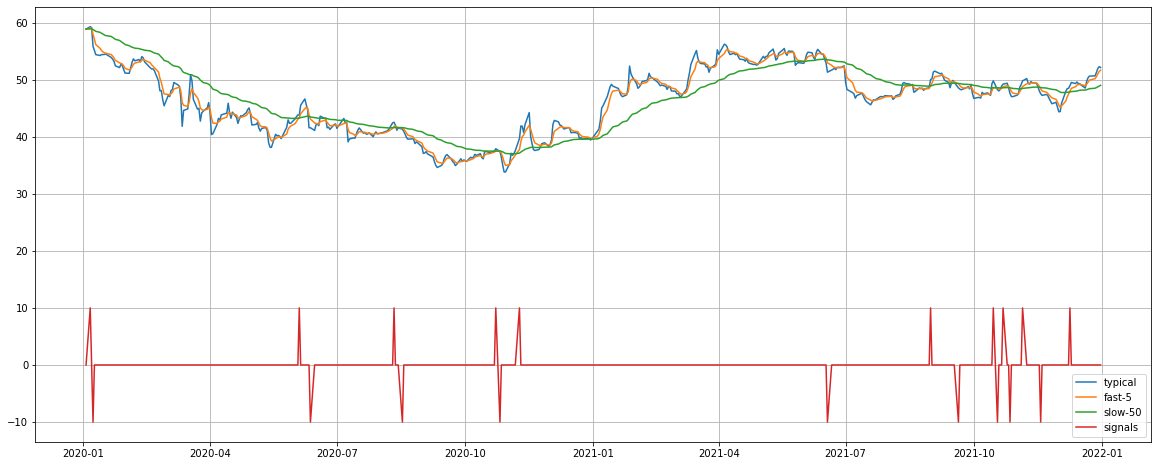

In [90]:
plt.figure(1, figsize=(20, 8));
all_positions = wba_trade['Position']
buy_price = wba_trade[wba_trade['Position'] == 1]['Close']
sell_price = wba_trade[wba_trade['Position'] == -1]['Close']
plt.plot(wba_trade.index, curves[0], label='typical'.format(final_fast));
plt.plot(wba_trade.index, curves[1], label='fast-{}'.format(final_fast));
plt.plot(wba_trade.index, curves[2], label='slow-{}'.format(final_slow));
#plt.scatter(buy_price.index, buy_price, marker='^', color = 'green', label = 'buy', s = 100);
#plt.scatter(buy_price.index, buy_price, marker='v', color = 'red', label = 'sell', s = 100);
plt.plot(wba_trade.index, all_positions*10, label='signals')
plt.legend();
plt.grid(True)


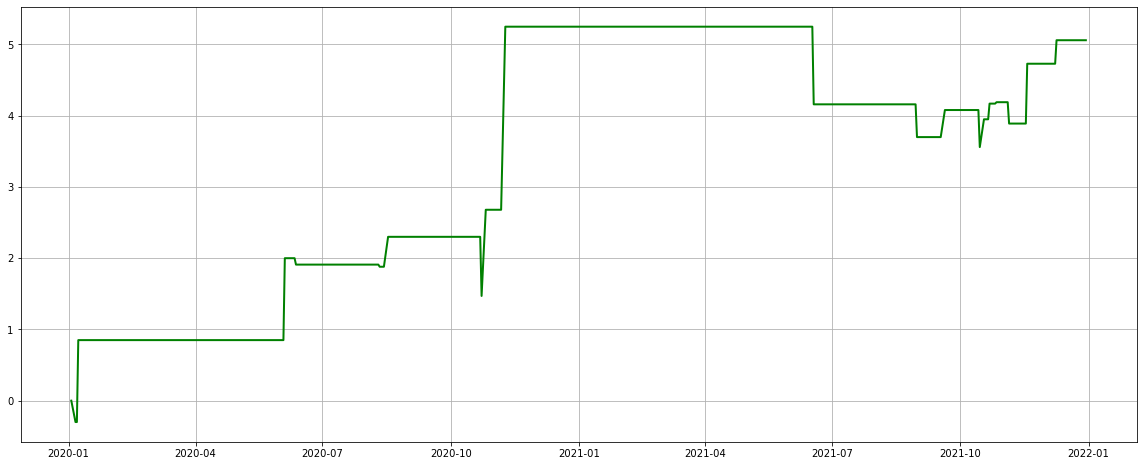

In [97]:
plt.figure(2, figsize=(20, 8));
plt.plot(pnl.index, pnl, color='green', lw=2);
plt.grid(True);

In [98]:
s

30.811626486956758

### Bollinger Band Breakout

In [119]:
bbwi_train, bbwi_test = train_test_split(bbwi)
bbwi_train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,33.476151,31.624899,33.233631,31.649151,5454799.0,19.857880
2012-01-04,32.190784,31.269199,31.616816,32.061440,6293485.0,20.116566
2012-01-05,32.206951,31.608730,32.206951,31.802750,9961561.0,19.954258
2012-01-06,31.891672,31.083265,31.519806,31.422796,8522683.0,19.715860
2012-01-09,31.729992,31.139854,31.382378,31.511723,5605342.0,19.771658


In [120]:
# grid search
training_data = bbwi_train
all_spans = [5, 15, 20, 25, 30, 35, 40, 45, 50]
all_stds = [1, 1.5, 2]
curr_max = 0
current_params = None
for i in range(len(all_spans)):
    for j in range(len(all_stds)):
        test_trade, _ = double_bollinger_band_breakout(training_data, all_spans[i], all_stds[j])
        # calculate final PNL
        pnl = cumulative_pnl(test_trade['Position'], test_trade['Close'])
        s = calculate_sharpe_n_periods(pnl)
        print(s, pnl[-1])
        if (s > 1) and (pnl[-1] > curr_max):
            current_params = (all_spans[i], all_stds[j])

8.154155457607017 10.921542167663574
-27.892685205712652 -3.0476913452148438
0 0.0
-20.65125025311191 -1.681549072265625
4.140980371424361 8.6984224319458
-15.985433740569713 -5.877152442932129
-26.097080775110474 -12.554617881774902
-14.186394297979522 1.2125682830810547
-29.539255045568886 -4.139056205749512
-41.46985815062095 -11.050936698913574
3.923929093863433 4.236001968383789
19.909837691369212 5.545658111572266
-36.05951415220999 -6.249014854431152
-15.964752362718837 -2.0452957153320312
2.8618912909108785 3.5731306076049805
-18.494252584842165 -8.084096908569336
-24.022202460191068 -7.526300430297852
-3.8939687033571744 2.6838998794555664
-25.6875444787439 -6.151991844177246
-24.975599366948867 -6.434953689575195
-11.739986990233104 -3.0396556854248047
-27.88165384621571 -16.418743133544922
-26.82626605190443 -8.965258598327637
-24.49392500300019 -2.756711959838867
-25.050201637112078 -13.080038070678711
-23.986617855309216 -5.181923866271973
-29.660159399682183 -6.8957462310

In [121]:
# test on test data
final_span, final_std = current_params
bbwi_trade, curves = double_bollinger_band_breakout(bbwi_test, final_span, final_std)

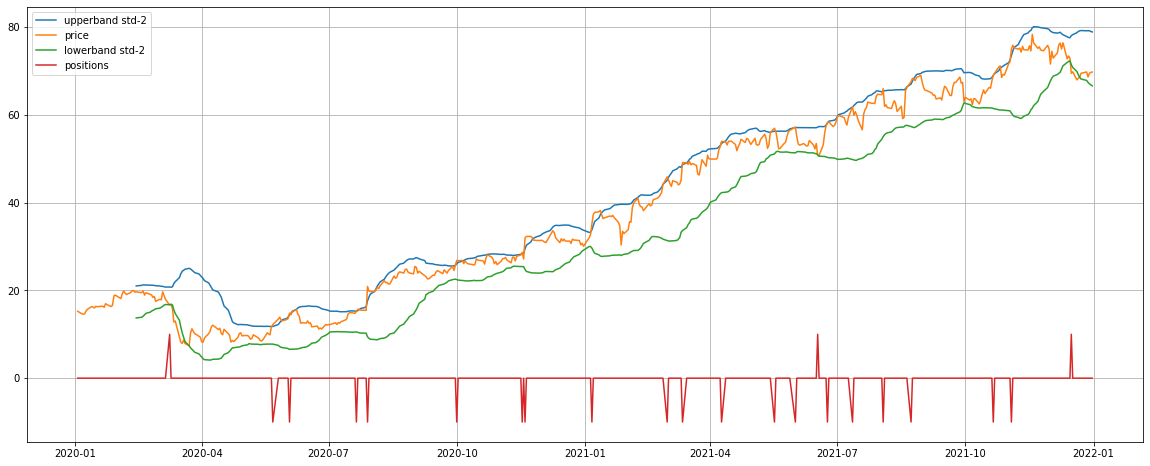

In [125]:
plt.figure(1, figsize=(20, 8));
all_positions = bbwi_trade['Position']
plt.plot(bbwi_trade.index, curves[0], label='upperband std-{}'.format(final_std));
plt.plot(bbwi_trade.index, bbwi_trade['Close'], label='price'.format(final_std));
plt.plot(bbwi_trade.index, curves[1], label='lowerband std-{}'.format(final_std));
plt.plot(bbwi_trade.index, all_positions*10, label='positions'.format(final_std));
plt.legend();
plt.grid(True)


In [123]:
pnl = cumulative_pnl(bbwi_trade['Position'], bbwi_trade['Close'])
s = calculate_sharpe_n_periods(pnl)

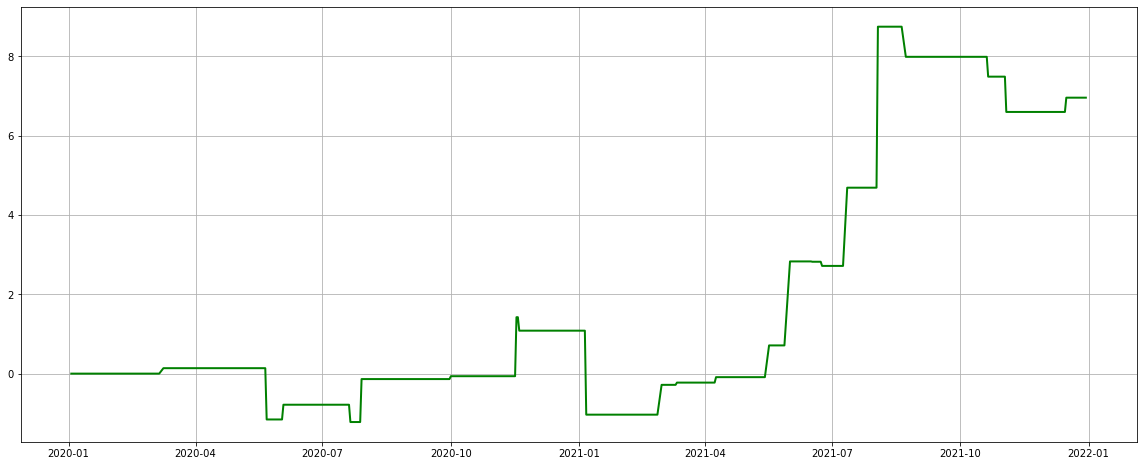

In [124]:
plt.figure(2, figsize=(20, 8));
plt.plot(pnl.index, pnl, color='green', lw=2);
plt.grid(True);

In [128]:
s

8.892219395277921

### MACD Crossover

In [146]:
kr_train, kr_test = train_test_split(kr)
training_data = kr_train
all_fast = [13,16,18,20,24,26]
all_slow = [24, 26, 28, 30]
all_smoothing = [8,9,10]
curr_max = 0
current_params = None
for i in range(len(all_fast)):
    for j in range(len(all_slow)):
        for k in range(len(all_smoothing)):
            test_trade, _ = MACD_crossover(training_data, fast_span=all_fast[i], slow_span=all_slow[j], \
                                           signal_span=all_smoothing[k])
            # calculate final PNL
            pnl = cumulative_pnl(test_trade['Position'], test_trade['Close'])
            s = calculate_sharpe_n_periods(pnl)
            print(s, pnl[-1])
            if (s > 1) and (pnl[-1] > curr_max):
                current_params = (all_fast[i], all_slow[j], all_smoothing[k])

-12.457157965201985 -20.329973220825195
-12.91321685042504 -26.12997817993164
-14.765924164646394 -27.619977951049805
-10.879436538505358 -24.49997329711914
-13.555744096073362 -27.53997230529785
-13.205012631477786 -23.199983596801758
-11.134277831020745 -21.95998764038086
-12.659268816857116 -23.37998390197754
-8.171274003602885 -17.34998893737793
-10.979844113646552 -19.809988021850586
-7.592358492133711 -18.719985961914062
3.7786900765782856 -9.700014114379883
-13.097261987888592 -25.45998191833496
-9.653127691239028 -15.819982528686523
-1.558284796046973 -13.250003814697266
-10.052912523569162 -18.519987106323242
-1.9274568847279088 -13.500001907348633
9.317515470808104 -8.660009384155273
-8.209342318085472 -18.510000228881836
4.665225781884027 -10.74001693725586
7.577483867809458 -10.400007247924805
1.3898727621487914 -12.440008163452148
10.329782985672377 -7.350011825561523
7.4627103375171435 -9.780017852783203
-8.951930765696046 -17.259990692138672
1.3591128899363063 -12.620018

In [151]:
# test on test data
final_fast, final_slow, final_smooth = current_params
kr_trade, curves = MACD_crossover(kr_test, final_fast, final_slow, final_smooth)
pnl = cumulative_pnl(kr_trade['Position'], kr_trade['Close'])
s = calculate_sharpe_n_periods(pnl)

(array([ 5.,  2.,  1.,  1.,  1.,  1.,  4.,  3.,  4.,  4.,  5.,  4., 16.,
        35., 44., 56., 54., 49., 55., 58., 29., 29., 14., 10.,  5.,  8.,
         4.,  1.,  0.,  2.]),
 array([-0.13453614, -0.1265748 , -0.11861345, -0.11065211, -0.10269077,
        -0.09472942, -0.08676808, -0.07880673, -0.07084539, -0.06288405,
        -0.0549227 , -0.04696136, -0.03900001, -0.03103867, -0.02307732,
        -0.01511598, -0.00715464,  0.00080671,  0.00876805,  0.0167294 ,
         0.02469074,  0.03265208,  0.04061343,  0.04857477,  0.05653612,
         0.06449746,  0.07245881,  0.08042015,  0.08838149,  0.09634284,
         0.10430418]),
 <BarContainer object of 30 artists>)

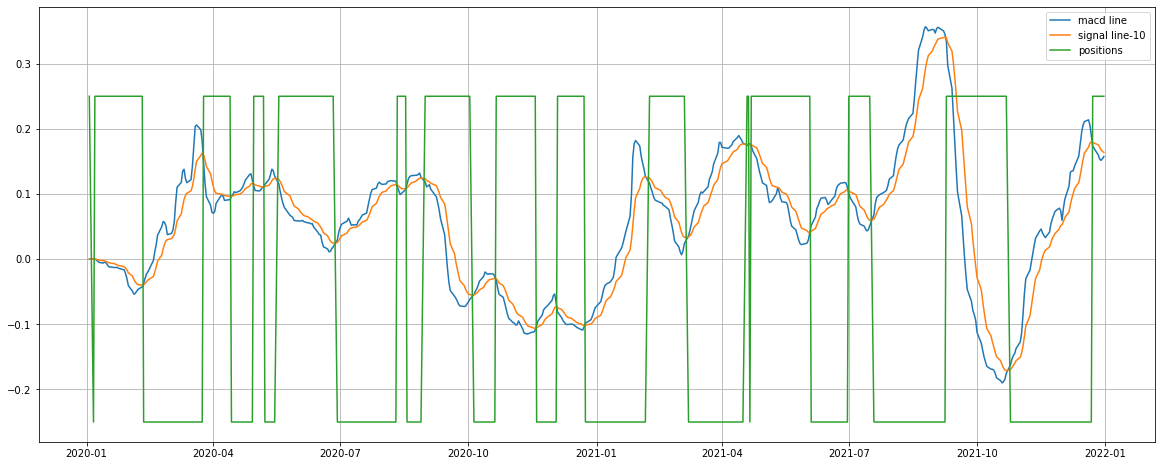

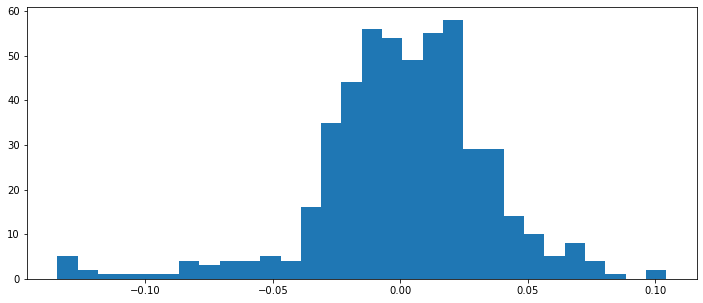

In [154]:
plt.figure(1, figsize=(20, 8));
all_positions = kr_trade['Position']
plt.plot(bbwi_trade.index, curves[0], label='macd line'.format(final_std));
plt.plot(bbwi_trade.index, curves[1], label='signal line-{}'.format(final_smooth));
plt.plot(bbwi_trade.index, all_positions*0.25, label='positions'.format(final_std));
plt.legend();
plt.grid(True)

plt.figure(2, figsize=(12, 5));
plt.hist(curves[2], 30)

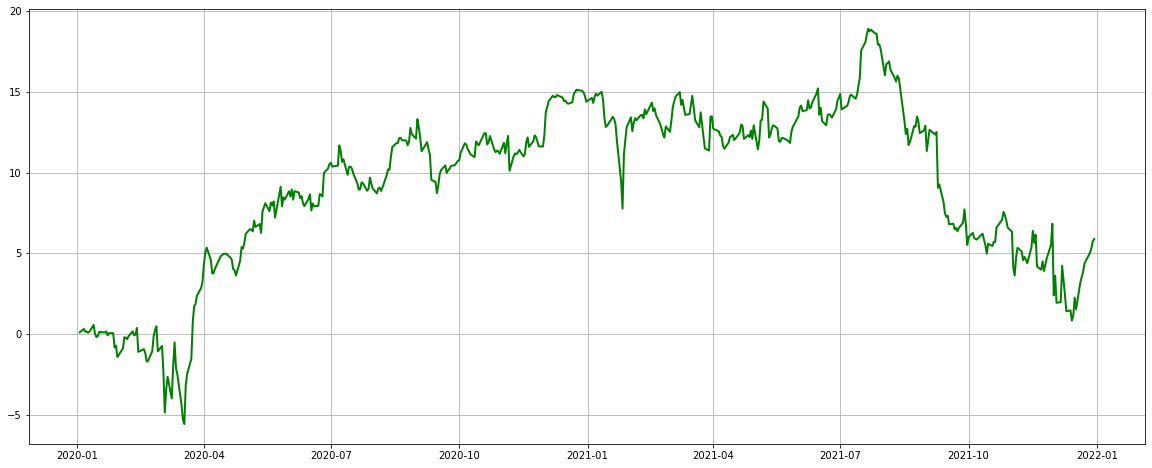

In [157]:
plt.figure(2, figsize=(20, 8));
plt.plot(pnl.index, pnl, color='green', lw=2);
plt.grid(True);

### RSI Oscillator


In [160]:
kr_train, kr_test = train_test_split(kr)
training_data = kr_train
all_ub = [60, 65, 70]
all_lb = [30, 40, 50, 55]
all_smoothing = [9, 14, 21]
curr_max = 0
current_params = None
for i in range(len(all_ub)):
    for j in range(len(all_lb)):
        for k in range(len(all_smoothing)):
            test_trade, _ = rsi_70_30_rule(training_data, overbought=all_ub[i], oversold=all_lb[j], \
                                           lookback=all_smoothing[k])
            # calculate final PNL
            pnl = cumulative_pnl(test_trade['Position'], test_trade['Close'])
            s = calculate_sharpe_n_periods(pnl)
            print(s, pnl[-1])
            if (s > 1) and (pnl[-1] > curr_max):
                current_params = (all_ub[i], all_lb[j], all_smoothing[k])

19.5791779528874 2.3999977111816406
19.5791779528874 2.3999977111816406
19.5791779528874 2.3999977111816406
26.309320242211417 2.919997215270996
25.712007241925168 2.874998092651367
24.344642868837184 2.769998550415039
23.05190386727856 2.8750009536743164
22.87851076816159 2.8600006103515625
22.993703769102318 2.8700008392333984
10.395923227599495 1.4600028991699219
10.338235279196251 1.445002555847168
10.376578424046901 1.455002784729004
0 0.0
0 0.0
0 0.0
142.86531234136675 0.5199995040893555
134.25723853753948 0.47500038146972656
122.94881508089608 0.37000083923339844
26.921056487930976 0.4750032424926758
26.02384509822611 0.4600028991699219
26.633980189579667 0.4700031280517578
4.352765312312779 -0.9399948120117188
4.29844970350854 -0.9549951553344727
4.334570269273144 -0.9449949264526367
0 0.0
0 0.0
0 0.0
142.86531234136675 0.5199995040893555
134.25723853753948 0.47500038146972656
122.94881508089608 0.37000083923339844
26.921056487930976 0.4750032424926758
26.02384509822611 0.46000

In [167]:
# test on test data
final_ub, final_lb, final_lookback = current_params
kr_trade, curves = rsi_70_30_rule(kr_test, overbought=final_ub, oversold=final_lb, lookback=final_lookback)
pnl = cumulative_pnl(kr_trade['Position'], kr_trade['Close'])
s = calculate_sharpe_n_periods(pnl)

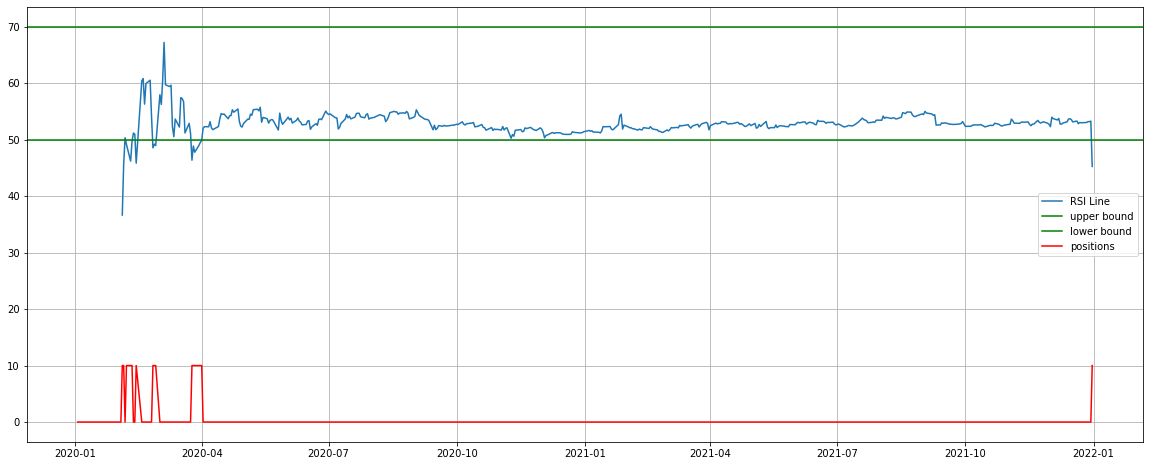

In [177]:
plt.figure(1, figsize=(20, 8));
all_positions = kr_trade['Position']
plt.plot(kr_trade.index, curves, label='RSI Line');
plt.axhline(y=final_ub, color='green', label='upper bound');
plt.axhline(y=final_lb, color='green', label='lower bound')
plt.plot(kr_trade.index, all_positions*10, label='positions'.format(final_std), color='red');
plt.legend();
plt.grid(True)

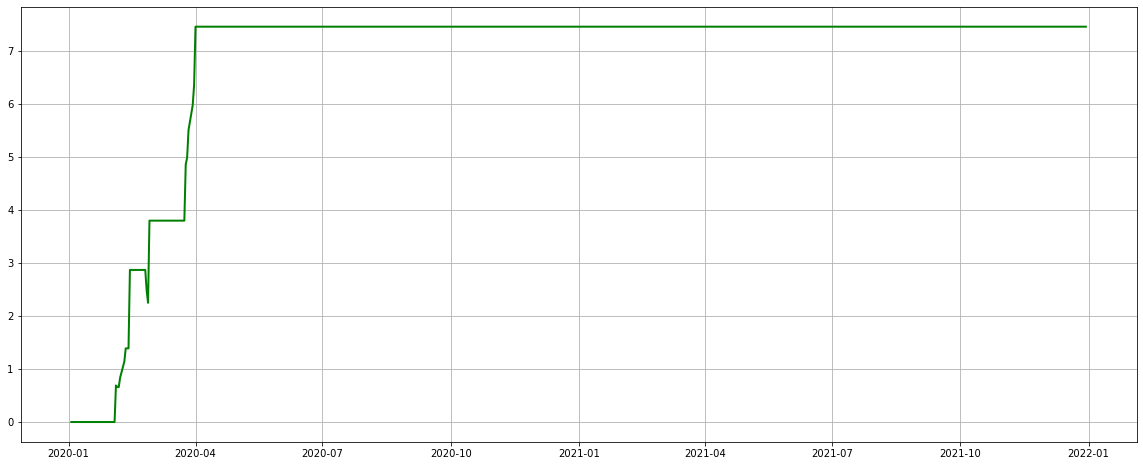

In [178]:
plt.figure(2, figsize=(20, 8));
plt.plot(pnl.index, pnl, color='green', lw=2);
plt.grid(True);

### Gaussian Smoothing

We smooth the price data and compute the derivatives.

In [181]:
kr_train.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,12.350,12.200,12.240,12.260,7598000.0,10.205094
2012-01-04,12.295,12.125,12.270,12.135,6958400.0,10.101046
2012-01-05,12.170,12.005,12.140,12.145,8526800.0,10.109370
2012-01-06,12.175,12.020,12.145,12.095,7542200.0,10.067749
2012-01-09,12.160,12.055,12.105,12.130,5879600.0,10.096883


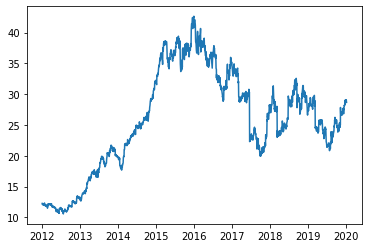

In [183]:
plt.plot(kr_train['Close'])

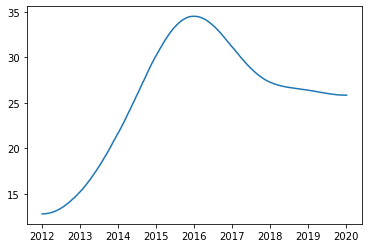

In [199]:
import scipy.ndimage
kr_train_dates = kr_train.index
close_unfiltered = kr_train['Close']
close_filtered = scipy.ndimage.gaussian_filter1d(close_unfiltered, sigma=200)
plt.plot(kr_train_dates, close_filtered)

In [218]:
close_filtered = scipy.ndimage.gaussian_filter1d(close_unfiltered, sigma=20)
# first derivative
close_filtered_p = pd.Series(np.gradient(close_filtered.data), close_unfiltered.index, name='slope')
close_filtered_pp = pd.Series(np.gradient(close_filtered_p.values), close_unfiltered.index, name='2nd slope')

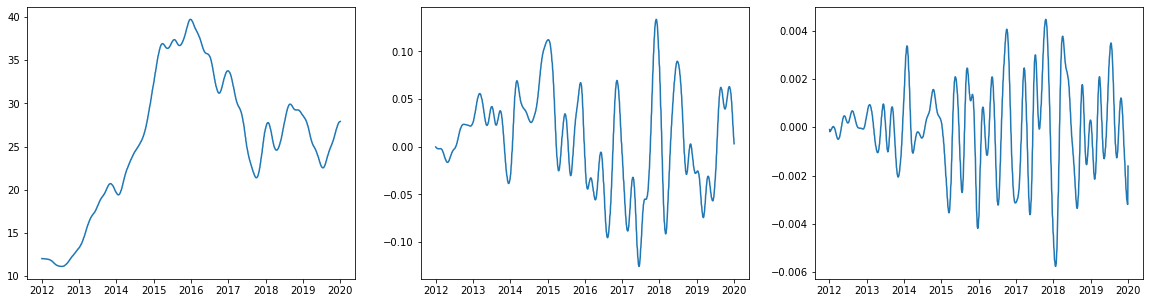

In [225]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].plot(kr_train_dates, close_filtered);
ax[1].plot(kr_train_dates, close_filtered_p);
ax[2].plot(kr_train_dates, close_filtered_pp);

In [231]:
# strategy
def trend_following(df, b=5):
    return_df = df.copy()
    return_df['Position'] = 0
    # estimate first derivative on smoothed data
    close = return_df['Close']
    dates = close.index
    close_filtered = scipy.ndimage.gaussian_filter1d(close, sigma=b)
    close_filtered_p = pd.Series(np.gradient(close_filtered.data), dates, name='slope')
    for date in df.index:
        if close_filtered_p[date] > 0:
            return_df.loc[date, 'Position'] = 1
        elif close_filtered_p[date] < 0:
            return_df.loc[date, 'Position'] = -1
        else:
            return_df.loc[date, 'Position'] = 0
    return return_df

def contrarian(df, b=5, tol=1e-3):
    return_df = df.copy()
    return_df['Position'] = 0
    # estimate first derivative on smoothed data
    close = return_df['Close']
    dates = close.index
    close_filtered = scipy.ndimage.gaussian_filter1d(close, sigma=b)
    close_filtered_p = pd.Series(np.gradient(close_filtered.data), dates, name='slope')
    close_filtered_pp = pd.Series(np.gradient(close_filtered_p.values), dates, name='2nd slope')
    for date in df.index:
        if (abs(close_filtered_p[date]) <= tol) and (close_filtered_pp[date] > 0):
            return_df.loc[date, 'Position'] = 1
        elif (abs(close_filtered_p[date]) <= tol) and (close_filtered_pp[date] < 0):
            return_df.loc[date, 'Position'] = -1
        else:
            return_df.loc[date, 'Position'] = 0
    return return_df

In [232]:
kr_train, kr_test = train_test_split(kr)

### Trend Following Search

In [233]:
all_b = [1, 2, 5, 10, 20, 50]
best_b = None
curr_max = 0
for i in range(len(all_b)):
    position_df = trend_following(kr_train, all_b[i])
    # calculate final PNL
    pnl = cumulative_pnl(position_df['Position'], position_df['Close'])
    s = calculate_sharpe_n_periods(pnl)
    print(s, pnl[-1])
    if (s > 1) and (pnl[-1] > curr_max):
        best_b = all_b[i]

20.43843652675686 373.72999382019043
20.66838767365427 300.1800003051758
20.341317426590546 209.23003387451172
20.64486244221279 164.14999198913574
20.651720105399285 124.58999824523926
22.760399062816976 70.99000549316406


In [235]:
final_b = best_b
kr_trade = trend_following(kr_train, final_b)
pnl = cumulative_pnl(kr_trade['Position'], kr_trade['Close'])
s = calculate_sharpe_n_periods(pnl)

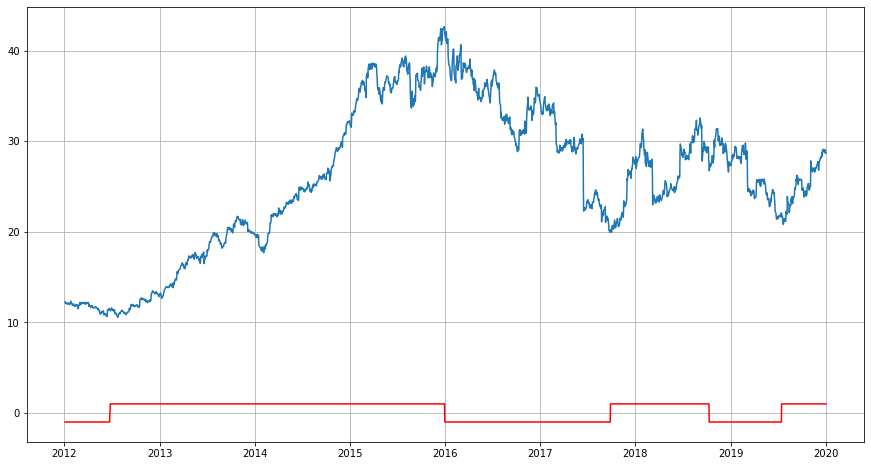

In [242]:
plt.figure(1, figsize=(15, 8))
plt.plot(kr_trade.index, kr_trade['Close'], label='price')
plt.plot(kr_trade.index, kr_trade['Position'], color='red', label='position')
plt.grid(True)

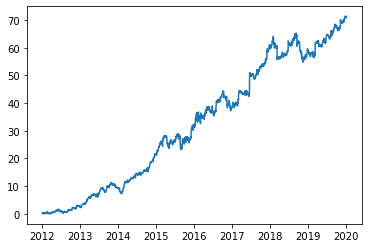

In [245]:
plt.plot(kr_trade.index[1:], pnl)

### Contrarian Search

In [246]:
kr_train, kr_test = train_test_split(kr)
all_b = [1, 2, 5, 10, 20, 50]
all_tol = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
best_b = None
best_tol = None
curr_max = 0
for i in range(len(all_b)):
    for j in range(len(all_tol)):
        position_df = contrarian(kr_train, all_b[i], all_tol[j])
        # calculate final PNL
        pnl = cumulative_pnl(position_df['Position'], position_df['Close'])
        s = calculate_sharpe_n_periods(pnl)
        print(s, pnl[-1])
        if (s > 1) and (pnl[-1] > curr_max):
            best_b = all_b[i]
            best_tol = all_tol[j]

24.088523653450263 71.94505882263184
19.387012136851894 12.464999198913574
15.902431826714855 1.5750007629394531
56.70765045185909 0.16000080108642578
0 0.0
0 0.0
26.4662558972054 39.2700252532959
27.039662578911884 5.895029067993164
-11.571796360015831 -0.3100004196166992
-27.12428301773485 -0.1750011444091797
-12.989229217285619 -0.09000015258789062
0 0.0
20.207264952697003 25.0700044631958
-42.62338985352954 -1.0299816131591797
-13.74988922829145 0.09499740600585938
0 0.0
0 0.0
0 0.0
16.727781924719835 20.805002212524414
16.58820960576678 0.23000144958496094
-20.397456947129218 -0.1750030517578125
57.21402915112035 0.029999732971191406
57.21402915112035 0.029999732971191406
0 0.0
15.014934582844644 14.454986572265625
17.748672510274744 7.275003433227539
-10.345971717794322 -1.3649988174438477
-23.839191614818837 -0.0449981689453125
0 0.0
0 0.0
13.95865716702546 15.70001220703125
9.70746363379959 6.000002861022949
22.739316790339984 1.8849992752075195
-63.3514761910054 -0.09999942779

In [248]:
final_b = best_b
final_tol = best_tol

In [253]:
kr_trade = contrarian(kr_test, final_b, final_tol)
pnl = cumulative_pnl(kr_trade['Position'], kr_trade['Close'])
s = abs(calculate_sharpe_n_periods(pnl))

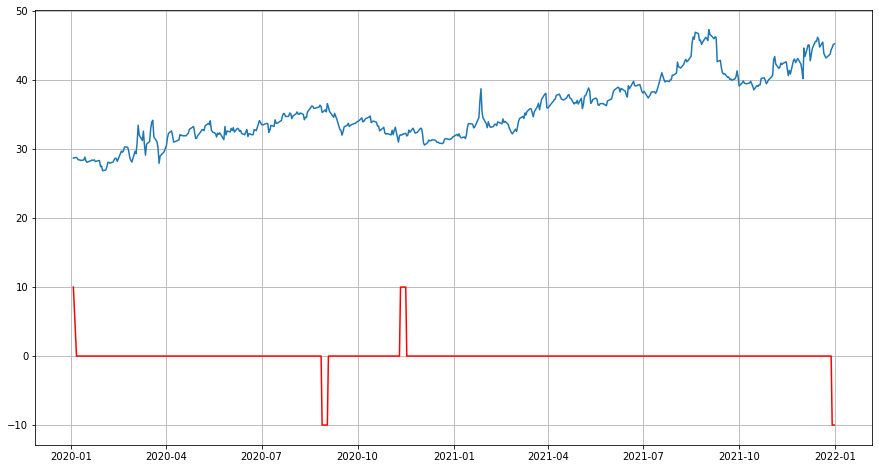

In [255]:
plt.figure(1, figsize=(15, 8))
plt.plot(kr_trade.index, kr_trade['Close'], label='price')
plt.plot(kr_trade.index, kr_trade['Position']*10, color='red', label='position')
plt.grid(True)

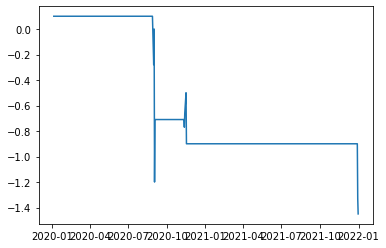

In [256]:
plt.plot(kr_trade.index[1:], pnl)